In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
# Reading the file
### Busiest day consumption for other futures
l_BM_variables = pd.read_csv(r'../../results/lowcap-BM-optimized-variables-aggregated-with-replacement.csv')
m_BM_variables = pd.read_csv(r'../../results/midcap-BM-optimized-variables-aggregated-with-replacement.csv')
h_BM_variables = pd.read_csv(r'../../results/highcap-BM-optimized-variables-aggregated-with-replacement.csv')
l_FE_variables = pd.read_csv(r'../../results/lowcap-FE-optimized-variables-aggregated.csv')
m_FE_variables = pd.read_csv(r'../../results/midcap-FE-optimized-variables-aggregated.csv')
h_FE_variables = pd.read_csv(r'../../results/highcap-FE-optimized-variables-aggregated.csv')
l_FH_variables = pd.read_csv(r'../../results/lowcap-FH-optimized-variables-aggregated-with-replacement.csv')
m_FH_variables = pd.read_csv(r'../../results/midcap-FH-optimized-variables-aggregated-with-replacement.csv')
h_FH_variables = pd.read_csv(r'../../results/highcap-FH-optimized-variables-aggregated-with-replacement.csv')

In [13]:
# Read the energy of trips operated all by BEBs
trip_info = pd.read_csv(r'../../results/busiest-day-trips-info.csv')

In [14]:
# Step 1: Extract the TripKey from the 'Variable' column in h_FH_variables
l_BM_variables['TripKey'] = l_BM_variables['Variable'].str.extract(r'\[(?:[^,]+,){2}(\d+)\]').astype(int)
m_BM_variables['TripKey'] = m_BM_variables['Variable'].str.extract(r'\[(?:[^,]+,){2}(\d+)\]').astype(int)
h_BM_variables['TripKey'] = h_BM_variables['Variable'].str.extract(r'\[(?:[^,]+,){2}(\d+)\]').astype(int)
l_FE_variables['TripKey'] = l_FE_variables['Variable'].str.extract(r'\[(?:[^,]+,){2}(\d+)\]').astype(int)
m_FE_variables['TripKey'] = m_FE_variables['Variable'].str.extract(r'\[(?:[^,]+,){2}(\d+)\]').astype(int)
h_FE_variables['TripKey'] = h_FE_variables['Variable'].str.extract(r'\[(?:[^,]+,){2}(\d+)\]').astype(int)
l_FH_variables['TripKey'] = l_FH_variables['Variable'].str.extract(r'\[(?:[^,]+,){2}(\d+)\]').astype(int)
m_FH_variables['TripKey'] = m_FH_variables['Variable'].str.extract(r'\[(?:[^,]+,){2}(\d+)\]').astype(int)
h_FH_variables['TripKey'] = h_FH_variables['Variable'].str.extract(r'\[(?:[^,]+,){2}(\d+)\]').astype(int)

In [15]:
# Step 2: Map the 'Energy' column from trip_info to h_FH_variables based on 'TripKey'
l_BM_variables['Energy'] = l_BM_variables['TripKey'].map(trip_info.set_index('TripKey')['Energy'])
m_BM_variables['Energy'] = m_BM_variables['TripKey'].map(trip_info.set_index('TripKey')['Energy'])
h_BM_variables['Energy'] = h_BM_variables['TripKey'].map(trip_info.set_index('TripKey')['Energy'])
l_FE_variables['Energy'] = l_FE_variables['TripKey'].map(trip_info.set_index('TripKey')['Energy'])
m_FE_variables['Energy'] = m_FE_variables['TripKey'].map(trip_info.set_index('TripKey')['Energy'])
h_FE_variables['Energy'] = h_FE_variables['TripKey'].map(trip_info.set_index('TripKey')['Energy'])
l_FH_variables['Energy'] = l_FH_variables['TripKey'].map(trip_info.set_index('TripKey')['Energy'])
m_FH_variables['Energy'] = m_FH_variables['TripKey'].map(trip_info.set_index('TripKey')['Energy'])
h_FH_variables['Energy'] = h_FH_variables['TripKey'].map(trip_info.set_index('TripKey')['Energy'])

In [16]:
### Filter to keep only rows with the "Value" (assignment) column equal to one
l_BM_variables = l_BM_variables[l_BM_variables['Value'] == 1]
m_BM_variables = m_BM_variables[m_BM_variables['Value'] == 1]
h_BM_variables = h_BM_variables[h_BM_variables['Value'] == 1]
l_FE_variables = l_FE_variables[l_FE_variables['Value'] == 1]
m_FE_variables = m_FE_variables[m_FE_variables['Value'] == 1]
h_FE_variables = h_FE_variables[h_FE_variables['Value'] == 1]
l_FH_variables = l_FH_variables[l_FH_variables['Value'] == 1]
m_FH_variables = m_FH_variables[m_FH_variables['Value'] == 1]
h_FH_variables = h_FH_variables[h_FH_variables['Value'] == 1]

In [18]:
### Calculate "busiest day energy" column
l_BM_variables['busiest day gallons'] = l_BM_variables['Value'] * l_BM_variables['Coefficient']
m_BM_variables['busiest day gallons'] = m_BM_variables['Value'] * m_BM_variables['Coefficient']
h_BM_variables['busiest day gallons'] = h_BM_variables['Value'] * h_BM_variables['Coefficient']
l_FE_variables['busiest day gallons'] = l_FE_variables['Value'] * l_FE_variables['Coefficient']
m_FE_variables['busiest day gallons'] = m_FE_variables['Value'] * m_FE_variables['Coefficient']
h_FE_variables['busiest day gallons'] = h_FE_variables['Value'] * h_FE_variables['Coefficient']
l_FH_variables['busiest day gallons'] = l_FH_variables['Value'] * l_FH_variables['Coefficient']
m_FH_variables['busiest day gallons'] = m_FH_variables['Value'] * m_FH_variables['Coefficient']
h_FH_variables['busiest day gallons'] = h_FH_variables['Value'] * h_FH_variables['Coefficient']

In [19]:
# Create a dictionary to store all dataframes with their respective names
dfs = {
    'l_BM': l_BM_variables,
    'm_BM': m_BM_variables,
    'h_BM': h_BM_variables,
    'l_FE': l_FE_variables,
    'm_FE': m_FE_variables,
    'h_FE': h_FE_variables,
    'l_FH': l_FH_variables,
    'm_FH': m_FH_variables,
    'h_FH': h_FH_variables,
}

# Initialize an empty list to store the dataframes with the new column
list_of_dfs = []

for future, df in dfs.items():
    # Add a new column with the name of the dataframe (future)
    df['future'] = future
    # Select the relevant columns
    df = df[['future', 'Year', 'Powertrain', 'dist', 'busiest day gallons', 'Energy']]
    # Append to the list
    list_of_dfs.append(df)

# Concatenate all dataframes
combined_df = pd.concat(list_of_dfs, ignore_index=True)

combined_df

future  Year Powertrain      dist  busiest day gallons     Energy
0        l_BM     0        CDB  3.527633             0.247132   1.676845
1        l_BM     0        CDB  6.489336             1.558568   9.951124
2        l_BM     0        CDB  6.489336             1.611629  11.354240
3        l_BM     0        CDB  3.527633             0.245797   2.015950
4        l_BM     0        CDB  6.489336             1.596454  10.666283
...       ...   ...        ...       ...                  ...        ...
276817   h_FH    12        BEB  5.674533             0.000000   9.710842
276818   h_FH    12        BEB  4.907396             0.000000   3.455277
276819   h_FH    12        BEB  5.904790             0.000000   7.910332
276820   h_FH    12        BEB  5.847957             0.000000   9.542812
276821   h_FH    12        BEB  5.847957             0.000000   8.419038

[276822 rows x 6 columns]

In [20]:
# Group by 'future', 'Year', and 'Powertrain' and aggregate the 'dist' column
result_df = combined_df.groupby(['future', 'Year', 'Powertrain'])[['dist', 'busiest day gallons', 'Energy']].sum().reset_index()

# Display the result
result_df

future  Year Powertrain          dist  busiest day gallons        Energy
0     h_BM     0        BEB    899.991132             0.000000   1590.039009
1     h_BM     0        CDB   8141.035997          1739.168902   9477.554897
2     h_BM     0        HEB   3499.861857           769.965104   4143.762905
3     h_BM     1        BEB   1034.999623             0.000000   1825.928097
4     h_BM     1        CDB   5106.006728           968.276912   5841.441616
..     ...   ...        ...           ...                  ...           ...
308   m_FH    10        HEB  11865.890219          2116.837171  13964.494816
309   m_FH    11        BEB    674.998766             0.000000   1246.861996
310   m_FH    11        HEB  11865.890219          2116.837171  13964.494816
311   m_FH    12        BEB    674.998766             0.000000   1246.861996
312   m_FH    12        HEB  11865.890219          2116.837171  13964.494816

[313 rows x 6 columns]

In [21]:
### Add one to years and then replace year 0 with the info from SQ
result_df['Year']=result_df['Year']+1
result_df

future  Year Powertrain          dist  busiest day gallons        Energy
0     h_BM     1        BEB    899.991132             0.000000   1590.039009
1     h_BM     1        CDB   8141.035997          1739.168902   9477.554897
2     h_BM     1        HEB   3499.861857           769.965104   4143.762905
3     h_BM     2        BEB   1034.999623             0.000000   1825.928097
4     h_BM     2        CDB   5106.006728           968.276912   5841.441616
..     ...   ...        ...           ...                  ...           ...
308   m_FH    11        HEB  11865.890219          2116.837171  13964.494816
309   m_FH    12        BEB    674.998766             0.000000   1246.861996
310   m_FH    12        HEB  11865.890219          2116.837171  13964.494816
311   m_FH    13        BEB    674.998766             0.000000   1246.861996
312   m_FH    13        HEB  11865.890219          2116.837171  13964.494816

[313 rows x 6 columns]

In [22]:
SQ = pd.read_csv(r'../../results/computed-fuel-rates-oct2021-sep2022-12212023.csv', low_memory=False)

In [23]:
total_energy_electric = SQ[SQ['Powertrain'] == 'electric']['Energy'].sum()
total_energy_electric

169141.58103750064

In [24]:
### Scale up the busiest day travelled distance to the whole year

### Read the ratios required for scaling up the busiest day results
ratios = pd.read_csv(r'../../results/diesel-consumption-distribution-compared-to-busiest-day.csv', low_memory=False)

# Sum the DieselRatio to get the total yearly scaling factor
total_yearly_ratio = ratios['DieselRatio'].sum()

# Scale up the dist values in result_df to the whole year
result_df['dist_scaled'] = result_df['dist'] * total_yearly_ratio
result_df['gallon_scaled'] = result_df['busiest day gallons'] * total_yearly_ratio
result_df['kwh_scaled'] = result_df['Energy'] * total_yearly_ratio


# Display the updated DataFrame
result_df

future  Year Powertrain          dist  busiest day gallons        Energy  \
0     h_BM     1        BEB    899.991132             0.000000   1590.039009   
1     h_BM     1        CDB   8141.035997          1739.168902   9477.554897   
2     h_BM     1        HEB   3499.861857           769.965104   4143.762905   
3     h_BM     2        BEB   1034.999623             0.000000   1825.928097   
4     h_BM     2        CDB   5106.006728           968.276912   5841.441616   
..     ...   ...        ...           ...                  ...           ...   
308   m_FH    11        HEB  11865.890219          2116.837171  13964.494816   
309   m_FH    12        BEB    674.998766             0.000000   1246.861996   
310   m_FH    12        HEB  11865.890219          2116.837171  13964.494816   
311   m_FH    13        BEB    674.998766             0.000000   1246.861996   
312   m_FH    13        HEB  11865.890219          2116.837171  13964.494816   

      dist_scaled  gallon_scaled    kwh_scaled  
0    2.324814e+05       0.000000  4.107312e+05  
1    2.102953e+06  449253.753079  2.448196e+06  
2    9.040675e+05  198893.685583  1.070397e+06  
3    2.673561e+05       0.000000  4.716650e+05  
4    1.318959e+06  250120.638808  1.508933e+06  
..            ...            ...           ...  
308  3.065140e+06  546811.205585  3.607241e+06  
309  1.743624e+05       0.000000  3.220834e+05  
310  3.065140e+06  546811.205585  3.607241e+06  
311  1.743624e+05       0.000000  3.220834e+05  
312  3.065140e+06  546811.205585  3.607241e+06  

[313 rows x 9 columns]

In [25]:
# Create the new rows for each unique 'future'
new_rows = []
unique_futures = result_df['future'].unique()

for future in unique_futures:
    new_rows.extend([
        {'future': future, 'Year': 0, 'Powertrain': 'BEB', 'dist': 0, 'busiest day gallons': 0, 'Energy': 0, 'dist_scaled': 0, 'gallon_scaled': 0, 'kwh_scaled': 169141.6},
        {'future': future, 'Year': 0, 'Powertrain': 'HEB', 'dist': 0, 'busiest day gallons': 0, 'Energy': 0, 'dist_scaled': 0, 'gallon_scaled': 0, 'kwh_scaled': 0},
        {'future': future, 'Year': 0, 'Powertrain': 'CDB', 'dist': 0, 'busiest day gallons': 0, 'Energy': 0, 'dist_scaled': 0, 'gallon_scaled': 707460.7, 'kwh_scaled': 0}
    ])

# Convert the new rows to a DataFrame
new_rows_df = pd.DataFrame(new_rows)

# Append the new rows to the original DataFrame
result_df = pd.concat([result_df, new_rows_df], ignore_index=True)

# Sort the DataFrame by 'future' and 'Year' for better readability
result_df = result_df.sort_values(by=['future', 'Year']).reset_index(drop=True)
result_df

future  Year Powertrain          dist  busiest day gallons        Energy  \
0     h_BM     0        BEB      0.000000             0.000000      0.000000   
1     h_BM     0        HEB      0.000000             0.000000      0.000000   
2     h_BM     0        CDB      0.000000             0.000000      0.000000   
3     h_BM     1        BEB    899.991132             0.000000   1590.039009   
4     h_BM     1        CDB   8141.035997          1739.168902   9477.554897   
..     ...   ...        ...           ...                  ...           ...   
335   m_FH    11        HEB  11865.890219          2116.837171  13964.494816   
336   m_FH    12        BEB    674.998766             0.000000   1246.861996   
337   m_FH    12        HEB  11865.890219          2116.837171  13964.494816   
338   m_FH    13        BEB    674.998766             0.000000   1246.861996   
339   m_FH    13        HEB  11865.890219          2116.837171  13964.494816   

      dist_scaled  gallon_scaled    kwh_scaled  
0    0.000000e+00       0.000000  1.691416e+05  
1    0.000000e+00       0.000000  0.000000e+00  
2    0.000000e+00  707460.700000  0.000000e+00  
3    2.324814e+05       0.000000  4.107312e+05  
4    2.102953e+06  449253.753079  2.448196e+06  
..            ...            ...           ...  
335  3.065140e+06  546811.205585  3.607241e+06  
336  1.743624e+05       0.000000  3.220834e+05  
337  3.065140e+06  546811.205585  3.607241e+06  
338  1.743624e+05       0.000000  3.220834e+05  
339  3.065140e+06  546811.205585  3.607241e+06  

[340 rows x 9 columns]

# Estimate operation costs (gallons and kwh) using the energy model output 
### Price of each gallons of diesel: $3.6/gallon; Source: https://www.eia.gov/petroleum/gasdiesel/


### Price of each kwh: $0.11/kWh; Source: https://ww2.arb.ca.gov/sites/default/files/2022-06/ratesanddemand_ADA.pdf

In [26]:
# Create the 'operating_cost' column based on the conditions
result_df['operating_cost'] = np.where(
    result_df['Powertrain'] == 'BEB', 
    result_df['kwh_scaled'] * 0.11, 
    np.where(result_df['Powertrain'].isin(['HEB', 'CDB']), 
             result_df['gallon_scaled'] * 3.6, 
             0)  # Default value if no conditions are met
)

result_df

future  Year Powertrain          dist  busiest day gallons        Energy  \
0     h_BM     0        BEB      0.000000             0.000000      0.000000   
1     h_BM     0        HEB      0.000000             0.000000      0.000000   
2     h_BM     0        CDB      0.000000             0.000000      0.000000   
3     h_BM     1        BEB    899.991132             0.000000   1590.039009   
4     h_BM     1        CDB   8141.035997          1739.168902   9477.554897   
..     ...   ...        ...           ...                  ...           ...   
335   m_FH    11        HEB  11865.890219          2116.837171  13964.494816   
336   m_FH    12        BEB    674.998766             0.000000   1246.861996   
337   m_FH    12        HEB  11865.890219          2116.837171  13964.494816   
338   m_FH    13        BEB    674.998766             0.000000   1246.861996   
339   m_FH    13        HEB  11865.890219          2116.837171  13964.494816   

      dist_scaled  gallon_scaled    kwh_scaled  operating_cost  
0    0.000000e+00       0.000000  1.691416e+05    1.860558e+04  
1    0.000000e+00       0.000000  0.000000e+00    0.000000e+00  
2    0.000000e+00  707460.700000  0.000000e+00    2.546859e+06  
3    2.324814e+05       0.000000  4.107312e+05    4.518044e+04  
4    2.102953e+06  449253.753079  2.448196e+06    1.617314e+06  
..            ...            ...           ...             ...  
335  3.065140e+06  546811.205585  3.607241e+06    1.968520e+06  
336  1.743624e+05       0.000000  3.220834e+05    3.542917e+04  
337  3.065140e+06  546811.205585  3.607241e+06    1.968520e+06  
338  1.743624e+05       0.000000  3.220834e+05    3.542917e+04  
339  3.065140e+06  546811.205585  3.607241e+06    1.968520e+06  

[340 rows x 10 columns]

# Estimate maintenance costs
### Based on the following paper:
### https://www.sciencedirect.com/science/article/pii/S1361920923000457
### maintenance costs (C_mnt_{i,j,k} in USD/mi) for CDB: 1.09, for HEB: 1.10, for BEB: 1.06
### Regular maintenance midlife costs (C_mid_{i,j,k} in USD after 7 years) for CDB: 30000, for HEB: 30000, for BEB: 65000

In [27]:
maintenance_costs = {
    'CDB': 1.09,
    'HEB': 1.10,
    'BEB': 1.06
}
result_df['maintenance_cost'] = result_df.apply(lambda row: row['dist_scaled'] * maintenance_costs[row['Powertrain']], axis=1)

In [28]:
### Read fleet data
fleets = pd.read_csv(r'../../results/futures-fleet-data.csv')
fleets

Powertrain  Value  Year  Strategy Scenario
0          CDB    141     0    Hybrid   lo-cap
1          CDB    119     1    Hybrid   lo-cap
2          CDB    106     2    Hybrid   lo-cap
3          CDB     93     3    Hybrid   lo-cap
4          CDB     80     4    Hybrid   lo-cap
..         ...    ...   ...       ...      ...
373        BEB    119     9  Electric   hi-cap
374        BEB    142    10  Electric   hi-cap
375        BEB    165    11  Electric   hi-cap
376        BEB    188    12  Electric   hi-cap
377        BEB    211    13  Electric   hi-cap

[378 rows x 5 columns]

In [29]:
result_df

future  Year Powertrain          dist  busiest day gallons        Energy  \
0     h_BM     0        BEB      0.000000             0.000000      0.000000   
1     h_BM     0        HEB      0.000000             0.000000      0.000000   
2     h_BM     0        CDB      0.000000             0.000000      0.000000   
3     h_BM     1        BEB    899.991132             0.000000   1590.039009   
4     h_BM     1        CDB   8141.035997          1739.168902   9477.554897   
..     ...   ...        ...           ...                  ...           ...   
335   m_FH    11        HEB  11865.890219          2116.837171  13964.494816   
336   m_FH    12        BEB    674.998766             0.000000   1246.861996   
337   m_FH    12        HEB  11865.890219          2116.837171  13964.494816   
338   m_FH    13        BEB    674.998766             0.000000   1246.861996   
339   m_FH    13        HEB  11865.890219          2116.837171  13964.494816   

      dist_scaled  gallon_scaled    kwh_scaled  operating_cost  \
0    0.000000e+00       0.000000  1.691416e+05    1.860558e+04   
1    0.000000e+00       0.000000  0.000000e+00    0.000000e+00   
2    0.000000e+00  707460.700000  0.000000e+00    2.546859e+06   
3    2.324814e+05       0.000000  4.107312e+05    4.518044e+04   
4    2.102953e+06  449253.753079  2.448196e+06    1.617314e+06   
..            ...            ...           ...             ...   
335  3.065140e+06  546811.205585  3.607241e+06    1.968520e+06   
336  1.743624e+05       0.000000  3.220834e+05    3.542917e+04   
337  3.065140e+06  546811.205585  3.607241e+06    1.968520e+06   
338  1.743624e+05       0.000000  3.220834e+05    3.542917e+04   
339  3.065140e+06  546811.205585  3.607241e+06    1.968520e+06   

     maintenance_cost  
0        0.000000e+00  
1        0.000000e+00  
2        0.000000e+00  
3        2.464303e+05  
4        2.292219e+06  
..                ...  
335      3.371654e+06  
336      1.848242e+05  
337      3.371654e+06  
338      1.848242e+05  
339      3.371654e+06  

[340 rows x 11 columns]

In [30]:
# Creating the mapping for 'future' column based on 'Strategy' and 'Scenario' from 'fleets'
mapping = {
    ('Electric', 'hi-cap'): 'h_FE',
    ('Electric', 'mid-cap'): 'm_FE',
    ('Electric', 'lo-cap'): 'l_FE',
    ('Hybrid', 'hi-cap'): 'h_FH',
    ('Hybrid', 'mid-cap'): 'm_FH',
    ('Hybrid', 'lo-cap'): 'l_FH',
    ('Hybrid Electric', 'hi-cap'): 'h_BM',
    ('Hybrid Electric', 'mid-cap'): 'm_BM',
    ('Hybrid Electric', 'lo-cap'): 'l_BM'
}

# Applying the mapping to create the 'future' column in 'fleets'
fleets['future'] = fleets.apply(lambda row: mapping[(row['Strategy'], row['Scenario'])], axis=1)

# Merging 'fleets' into 'result_df' based on 'future', 'Year', and 'Powertrain' columns to add the 'Value' as 'fleet'
result_df = result_df.merge(fleets[['future', 'Powertrain', 'Year', 'Value']], on=['future', 'Powertrain', 'Year'], how='left')

# Renaming the 'Value' column to 'fleet' in the result_df
result_df.rename(columns={'Value': 'fleet'}, inplace=True)

# Display the updated result_df to the user
result_df.head()

future  Year Powertrain         dist  busiest day gallons       Energy  \
0   h_BM     0        BEB     0.000000             0.000000     0.000000   
1   h_BM     0        HEB     0.000000             0.000000     0.000000   
2   h_BM     0        CDB     0.000000             0.000000     0.000000   
3   h_BM     1        BEB   899.991132             0.000000  1590.039009   
4   h_BM     1        CDB  8141.035997          1739.168902  9477.554897   

    dist_scaled  gallon_scaled    kwh_scaled  operating_cost  \
0  0.000000e+00       0.000000  1.691416e+05    1.860558e+04   
1  0.000000e+00       0.000000  0.000000e+00    0.000000e+00   
2  0.000000e+00  707460.700000  0.000000e+00    2.546859e+06   
3  2.324814e+05       0.000000  4.107312e+05    4.518044e+04   
4  2.102953e+06  449253.753079  2.448196e+06    1.617314e+06   

   maintenance_cost  fleet  
0      0.000000e+00     15  
1      0.000000e+00      9  
2      0.000000e+00    141  
3      2.464303e+05     20  
4      2.292219e+06     99

In [31]:
nan_fleet_rows = result_df[result_df['fleet'].isna()]
nan_fleet_rows

Empty DataFrame
Columns: [future, Year, Powertrain, dist, busiest day gallons, Energy, dist_scaled, gallon_scaled, kwh_scaled, operating_cost, maintenance_cost, fleet]
Index: []

In [32]:
### Add midlife costs to the maintenance_cost (break it down to yearly basis)

# Updating the 'maintenance_cost' column based on the given conditions for the rows where fleet is not NaN
result_df['maintenance_cost'] = result_df.apply(
    lambda row: (30000 * row['fleet'] if row['Powertrain'] in ['CDB', 'HEB'] else 65000 * row['fleet']) / 14, axis=1
)

result_df

future  Year Powertrain          dist  busiest day gallons        Energy  \
0     h_BM     0        BEB      0.000000             0.000000      0.000000   
1     h_BM     0        HEB      0.000000             0.000000      0.000000   
2     h_BM     0        CDB      0.000000             0.000000      0.000000   
3     h_BM     1        BEB    899.991132             0.000000   1590.039009   
4     h_BM     1        CDB   8141.035997          1739.168902   9477.554897   
..     ...   ...        ...           ...                  ...           ...   
335   m_FH    11        HEB  11865.890219          2116.837171  13964.494816   
336   m_FH    12        BEB    674.998766             0.000000   1246.861996   
337   m_FH    12        HEB  11865.890219          2116.837171  13964.494816   
338   m_FH    13        BEB    674.998766             0.000000   1246.861996   
339   m_FH    13        HEB  11865.890219          2116.837171  13964.494816   

      dist_scaled  gallon_scaled    kwh_scaled  operating_cost  \
0    0.000000e+00       0.000000  1.691416e+05    1.860558e+04   
1    0.000000e+00       0.000000  0.000000e+00    0.000000e+00   
2    0.000000e+00  707460.700000  0.000000e+00    2.546859e+06   
3    2.324814e+05       0.000000  4.107312e+05    4.518044e+04   
4    2.102953e+06  449253.753079  2.448196e+06    1.617314e+06   
..            ...            ...           ...             ...   
335  3.065140e+06  546811.205585  3.607241e+06    1.968520e+06   
336  1.743624e+05       0.000000  3.220834e+05    3.542917e+04   
337  3.065140e+06  546811.205585  3.607241e+06    1.968520e+06   
338  1.743624e+05       0.000000  3.220834e+05    3.542917e+04   
339  3.065140e+06  546811.205585  3.607241e+06    1.968520e+06   

     maintenance_cost  fleet  
0        69642.857143     15  
1        19285.714286      9  
2       302142.857143    141  
3        92857.142857     20  
4       212142.857143     99  
..                ...    ...  
335     255000.000000    119  
336      69642.857143     15  
337     255000.000000    119  
338      69642.857143     15  
339     255000.000000    119  

[340 rows x 12 columns]

In [33]:
result_df.loc[result_df['Year']==0]

future  Year Powertrain  dist  busiest day gallons  Energy  dist_scaled  \
0     h_BM     0        BEB   0.0                  0.0     0.0          0.0   
1     h_BM     0        HEB   0.0                  0.0     0.0          0.0   
2     h_BM     0        CDB   0.0                  0.0     0.0          0.0   
33    h_FE     0        BEB   0.0                  0.0     0.0          0.0   
34    h_FE     0        HEB   0.0                  0.0     0.0          0.0   
35    h_FE     0        CDB   0.0                  0.0     0.0          0.0   
75    h_FH     0        BEB   0.0                  0.0     0.0          0.0   
76    h_FH     0        HEB   0.0                  0.0     0.0          0.0   
77    h_FH     0        CDB   0.0                  0.0     0.0          0.0   
107   l_BM     0        BEB   0.0                  0.0     0.0          0.0   
108   l_BM     0        HEB   0.0                  0.0     0.0          0.0   
109   l_BM     0        CDB   0.0                  0.0     0.0          0.0   
149   l_FE     0        BEB   0.0                  0.0     0.0          0.0   
150   l_FE     0        HEB   0.0                  0.0     0.0          0.0   
151   l_FE     0        CDB   0.0                  0.0     0.0          0.0   
191   l_FH     0        BEB   0.0                  0.0     0.0          0.0   
192   l_FH     0        HEB   0.0                  0.0     0.0          0.0   
193   l_FH     0        CDB   0.0                  0.0     0.0          0.0   
229   m_BM     0        BEB   0.0                  0.0     0.0          0.0   
230   m_BM     0        HEB   0.0                  0.0     0.0          0.0   
231   m_BM     0        CDB   0.0                  0.0     0.0          0.0   
265   m_FE     0        BEB   0.0                  0.0     0.0          0.0   
266   m_FE     0        HEB   0.0                  0.0     0.0          0.0   
267   m_FE     0        CDB   0.0                  0.0     0.0          0.0   
307   m_FH     0        BEB   0.0                  0.0     0.0          0.0   
308   m_FH     0        HEB   0.0                  0.0     0.0          0.0   
309   m_FH     0        CDB   0.0                  0.0     0.0          0.0   

     gallon_scaled  kwh_scaled  operating_cost  maintenance_cost  fleet  
0              0.0    169141.6       18605.576      69642.857143     15  
1              0.0         0.0           0.000      19285.714286      9  
2         707460.7         0.0     2546858.520     302142.857143    141  
33             0.0    169141.6       18605.576      69642.857143     15  
34             0.0         0.0           0.000      19285.714286      9  
35        707460.7         0.0     2546858.520     302142.857143    141  
75             0.0    169141.6       18605.576      69642.857143     15  
76             0.0         0.0           0.000      19285.714286      9  
77        707460.7         0.0     2546858.520     302142.857143    141  
107            0.0    169141.6       18605.576      69642.857143     15  
108            0.0         0.0           0.000      19285.714286      9  
109       707460.7         0.0     2546858.520     302142.857143    141  
149            0.0    169141.6       18605.576      69642.857143     15  
150            0.0         0.0           0.000      19285.714286      9  
151       707460.7         0.0     2546858.520     302142.857143    141  
191            0.0    169141.6       18605.576      69642.857143     15  
192            0.0         0.0           0.000      19285.714286      9  
193       707460.7         0.0     2546858.520     302142.857143    141  
229            0.0    169141.6       18605.576      69642.857143     15  
230            0.0         0.0           0.000      19285.714286      9  
231       707460.7         0.0     2546858.520     302142.857143    141  
265            0.0    169141.6       18605.576      69642.857143     15  
266            0.0         0.0           0.000      19285.714286      9  
267       70746

In [34]:
# Creating the new rows for 'future' = 'SQ' for all years (0 to 13) for each Powertrain
new_rows = []

# Loop over the years and powertrains
for year in range(14):  # For years 0 through 13
    for powertrain in ['CDB', 'HEB', 'BEB']:  # For each Powertrain
        # Copy the row where future='h_BM' and Year=0 and Powertrain=powertrain
        copy_row = result_df[(result_df['future'] == 'h_BM') & (result_df['Year'] == 0) & (result_df['Powertrain'] == powertrain)].iloc[0].copy()
        
        # Modify the 'future' and 'Year' columns
        copy_row['future'] = 'SQ'
        copy_row['Year'] = year
        
        # Append the new row to the list
        new_rows.append(copy_row)

# Convert the new rows into a DataFrame
new_rows_df = pd.DataFrame(new_rows)

# Append the new rows to result_df
result_df = pd.concat([result_df, new_rows_df], ignore_index=True)
result_df

future  Year Powertrain         dist  busiest day gallons       Energy  \
0     h_BM     0        BEB     0.000000             0.000000     0.000000   
1     h_BM     0        HEB     0.000000             0.000000     0.000000   
2     h_BM     0        CDB     0.000000             0.000000     0.000000   
3     h_BM     1        BEB   899.991132             0.000000  1590.039009   
4     h_BM     1        CDB  8141.035997          1739.168902  9477.554897   
..     ...   ...        ...          ...                  ...          ...   
377     SQ    12        HEB     0.000000             0.000000     0.000000   
378     SQ    12        BEB     0.000000             0.000000     0.000000   
379     SQ    13        CDB     0.000000             0.000000     0.000000   
380     SQ    13        HEB     0.000000             0.000000     0.000000   
381     SQ    13        BEB     0.000000             0.000000     0.000000   

      dist_scaled  gallon_scaled    kwh_scaled  operating_cost  \
0    0.000000e+00       0.000000  1.691416e+05    1.860558e+04   
1    0.000000e+00       0.000000  0.000000e+00    0.000000e+00   
2    0.000000e+00  707460.700000  0.000000e+00    2.546859e+06   
3    2.324814e+05       0.000000  4.107312e+05    4.518044e+04   
4    2.102953e+06  449253.753079  2.448196e+06    1.617314e+06   
..            ...            ...           ...             ...   
377  0.000000e+00       0.000000  0.000000e+00    0.000000e+00   
378  0.000000e+00       0.000000  1.691416e+05    1.860558e+04   
379  0.000000e+00  707460.700000  0.000000e+00    2.546859e+06   
380  0.000000e+00       0.000000  0.000000e+00    0.000000e+00   
381  0.000000e+00       0.000000  1.691416e+05    1.860558e+04   

     maintenance_cost  fleet  
0        69642.857143     15  
1        19285.714286      9  
2       302142.857143    141  
3        92857.142857     20  
4       212142.857143     99  
..                ...    ...  
377      19285.714286      9  
378      69642.857143     15  
379     302142.857143    141  
380      19285.714286      9  
381      69642.857143     15  

[382 rows x 12 columns]

In [35]:
# Define strategy names for renaming
strategy_names = {
    "SQ": "Status quo",
    "l_BM": "lo-cap Hybrid+Electric",
    "m_BM": "mid-cap Hybrid+Electric",
    "h_BM": "hi-cap Hybrid+Electric",
    "l_FE": "lo-cap Electric",
    "m_FE": "mid-cap Electric",
    "h_FE": "hi-cap Electric",
    "l_FH": "lo-cap Hybrid",
    "m_FH": "mid-cap Hybrid",
    "h_FH": "hi-cap Hybrid"
}

# Rename the 'future' column in result_df using the strategy_names dictionary
result_df['future'] = result_df['future'].map(strategy_names)
result_df

future  Year Powertrain         dist  \
0    hi-cap Hybrid+Electric     0        BEB     0.000000   
1    hi-cap Hybrid+Electric     0        HEB     0.000000   
2    hi-cap Hybrid+Electric     0        CDB     0.000000   
3    hi-cap Hybrid+Electric     1        BEB   899.991132   
4    hi-cap Hybrid+Electric     1        CDB  8141.035997   
..                      ...   ...        ...          ...   
377              Status quo    12        HEB     0.000000   
378              Status quo    12        BEB     0.000000   
379              Status quo    13        CDB     0.000000   
380              Status quo    13        HEB     0.000000   
381              Status quo    13        BEB     0.000000   

     busiest day gallons       Energy   dist_scaled  gallon_scaled  \
0               0.000000     0.000000  0.000000e+00       0.000000   
1               0.000000     0.000000  0.000000e+00       0.000000   
2               0.000000     0.000000  0.000000e+00  707460.700000   
3               0.000000  1590.039009  2.324814e+05       0.000000   
4            1739.168902  9477.554897  2.102953e+06  449253.753079   
..                   ...          ...           ...            ...   
377             0.000000     0.000000  0.000000e+00       0.000000   
378             0.000000     0.000000  0.000000e+00       0.000000   
379             0.000000     0.000000  0.000000e+00  707460.700000   
380             0.000000     0.000000  0.000000e+00       0.000000   
381             0.000000     0.000000  0.000000e+00       0.000000   

       kwh_scaled  operating_cost  maintenance_cost  fleet  
0    1.691416e+05    1.860558e+04      69642.857143     15  
1    0.000000e+00    0.000000e+00      19285.714286      9  
2    0.000000e+00    2.546859e+06     302142.857143    141  
3    4.107312e+05    4.518044e+04      92857.142857     20  
4    2.448196e+06    1.617314e+06     212142.857143     99  
..            ...             ...               ...    ...  
377  0.000000e+00    0.000000e+00      19285.714286      9  
378  1.691416e+05    1.860558e+04      69642.857143     15  
379  0.000000e+00    2.546859e+06     302142.857143    141  
380  0.000000e+00    0.000000e+00      19285.714286      9  
381  1.691416e+05    1.860558e+04      69642.857143     15  

[382 rows x 12 columns]

In [36]:
# Group the data by 'future' and 'Year', and calculate the total operating, maintenance, and fleet investment costs for each strategy
result_df = result_df.groupby(['future', 'Year']).agg({
    'operating_cost': 'sum',
    'maintenance_cost': 'sum',
}).reset_index()
result_df

future  Year  operating_cost  maintenance_cost
0                 Status quo     0    2.565464e+06     391071.428571
1                 Status quo     1    2.565464e+06     391071.428571
2                 Status quo     2    2.565464e+06     391071.428571
3                 Status quo     3    2.565464e+06     391071.428571
4                 Status quo     4    2.565464e+06     391071.428571
..                       ...   ...             ...               ...
135  mid-cap Hybrid+Electric     9    1.429640e+06     626071.428571
136  mid-cap Hybrid+Electric    10    1.325797e+06     682857.142857
137  mid-cap Hybrid+Electric    11    1.226400e+06     737500.000000
138  mid-cap Hybrid+Electric    12    1.128085e+06     792142.857143
139  mid-cap Hybrid+Electric    13    1.034795e+06     846785.714286

[140 rows x 4 columns]

### Integerate investments costs

In [37]:
### Read fleet data
investment = pd.read_csv(r'../../results/futures-investment-cost-data.csv')
investment

Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0    2022         15.0          9.0         0.0         0.0   
1    2023         23.0          9.0         8.0         0.0   
2    2024         23.0          9.0         0.0         0.0   
3    2025         27.0          9.0         4.0         0.0   
4    2026         38.0          9.0        11.0         0.0   
..    ...          ...          ...         ...         ...   
135  2031          NaN          NaN         NaN         NaN   
136  2032          NaN          NaN         NaN         NaN   
137  2033          NaN          NaN         NaN         NaN   
138  2034          NaN          NaN         NaN         NaN   
139  2035          NaN          NaN         NaN         NaN   

     BEB - Investment Cost (M$)  HEB - Investment Cost (M$)           future  \
0                           0.0                         0.0  hi-cap Electric   
1                          10.4                         0.0  hi-cap Electric   
2                           0.0                         0.0  hi-cap Electric   
3                           5.2                         0.0  hi-cap Electric   
4                          14.3                         0.0  hi-cap Electric   
..                          ...                         ...              ...   
135                         2.6                         0.0       Status quo   
136                         0.0                         0.0       Status quo   
137                         0.0                         0.0       Status quo   
138                         0.0                         0.0       Status quo   
139                         3.9                         0.0       Status quo   

     yearly_purchased_buses  CDB- Investment Cost (M$)  total_cost  \
0                       0.0                        0.0         0.0   
1                       8.0                        0.0        10.4   
2                       0.0                        0.0         0.0   
3                       4.0                        0.0         5.2   
4                      11.0                        0.0        14.3   
..                      ...                        ...         ...   
135                     NaN                        0.0         2.6   
136                     NaN                        0.0         0.0   
137                     NaN                        1.2         1.2   
138                     NaN                        0.0         0.0   
139                     NaN                        6.4        10.3   

     conventional  electric  hybrid  cumulative_cost  
0             NaN       NaN     NaN              0.0  
1             NaN       NaN     NaN             10.4  
2             NaN       NaN     NaN             10.4  
3             NaN       NaN     NaN             15.6  
4             NaN       NaN     NaN             29.9  
..            ...       ...     ...              ...  
135           0.0       2.0     0.0             44.3  
136           0.0       0.0     0.0             44.3  
137           3.0       0.0     0.0             45.5  
138           0.0       0.0     0.0             45.5  
139          16.0       3.0     0.0             55.8  

[140 rows x 15 columns]

In [38]:
# Creating a dictionary for the mapping of Year values to the specified replacements
mapping = {
    2022: 0,
    2023: 1,
    2024: 2,
    2025: 3,
    2026: 4,
    2027: 5,
    2028: 6,
    2029: 7,
    2030: 8,
    2031: 9,
    2032: 10,
    2033: 11,
    2034: 12,
    2035: 13
}

# Replacing the values in the 'Year' column of the 'all_data' dataframe
investment['Year'] = investment['Year'].replace(mapping)
investment

Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0       0         15.0          9.0         0.0         0.0   
1       1         23.0          9.0         8.0         0.0   
2       2         23.0          9.0         0.0         0.0   
3       3         27.0          9.0         4.0         0.0   
4       4         38.0          9.0        11.0         0.0   
..    ...          ...          ...         ...         ...   
135     9          NaN          NaN         NaN         NaN   
136    10          NaN          NaN         NaN         NaN   
137    11          NaN          NaN         NaN         NaN   
138    12          NaN          NaN         NaN         NaN   
139    13          NaN          NaN         NaN         NaN   

     BEB - Investment Cost (M$)  HEB - Investment Cost (M$)           future  \
0                           0.0                         0.0  hi-cap Electric   
1                          10.4                         0.0  hi-cap Electric   
2                           0.0                         0.0  hi-cap Electric   
3                           5.2                         0.0  hi-cap Electric   
4                          14.3                         0.0  hi-cap Electric   
..                          ...                         ...              ...   
135                         2.6                         0.0       Status quo   
136                         0.0                         0.0       Status quo   
137                         0.0                         0.0       Status quo   
138                         0.0                         0.0       Status quo   
139                         3.9                         0.0       Status quo   

     yearly_purchased_buses  CDB- Investment Cost (M$)  total_cost  \
0                       0.0                        0.0         0.0   
1                       8.0                        0.0        10.4   
2                       0.0                        0.0         0.0   
3                       4.0                        0.0         5.2   
4                      11.0                        0.0        14.3   
..                      ...                        ...         ...   
135                     NaN                        0.0         2.6   
136                     NaN                        0.0         0.0   
137                     NaN                        1.2         1.2   
138                     NaN                        0.0         0.0   
139                     NaN                        6.4        10.3   

     conventional  electric  hybrid  cumulative_cost  
0             NaN       NaN     NaN              0.0  
1             NaN       NaN     NaN             10.4  
2             NaN       NaN     NaN             10.4  
3             NaN       NaN     NaN             15.6  
4             NaN       NaN     NaN             29.9  
..            ...       ...     ...              ...  
135           0.0       2.0     0.0             44.3  
136           0.0       0.0     0.0             44.3  
137           3.0       0.0     0.0             45.5  
138           0.0       0.0     0.0             45.5  
139          16.0       3.0     0.0             55.8  

[140 rows x 15 columns]

In [39]:
# Creating a dictionary for the mapping of Year values to the specified replacements
mapping = {
    "lo-cap Hybrid Electric": "lo-cap Hybrid+Electric",
    "mid-cap Hybrid Electric": "mid-cap Hybrid+Electric",
    "hi-cap Hybrid Electric": "hi-cap Hybrid+Electric"
}

# Replacing the values in the 'Year' column of the 'all_data' dataframe
investment['future'] = investment['future'].replace(mapping)
investment

Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
0       0         15.0          9.0         0.0         0.0   
1       1         23.0          9.0         8.0         0.0   
2       2         23.0          9.0         0.0         0.0   
3       3         27.0          9.0         4.0         0.0   
4       4         38.0          9.0        11.0         0.0   
..    ...          ...          ...         ...         ...   
135     9          NaN          NaN         NaN         NaN   
136    10          NaN          NaN         NaN         NaN   
137    11          NaN          NaN         NaN         NaN   
138    12          NaN          NaN         NaN         NaN   
139    13          NaN          NaN         NaN         NaN   

     BEB - Investment Cost (M$)  HEB - Investment Cost (M$)           future  \
0                           0.0                         0.0  hi-cap Electric   
1                          10.4                         0.0  hi-cap Electric   
2                           0.0                         0.0  hi-cap Electric   
3                           5.2                         0.0  hi-cap Electric   
4                          14.3                         0.0  hi-cap Electric   
..                          ...                         ...              ...   
135                         2.6                         0.0       Status quo   
136                         0.0                         0.0       Status quo   
137                         0.0                         0.0       Status quo   
138                         0.0                         0.0       Status quo   
139                         3.9                         0.0       Status quo   

     yearly_purchased_buses  CDB- Investment Cost (M$)  total_cost  \
0                       0.0                        0.0         0.0   
1                       8.0                        0.0        10.4   
2                       0.0                        0.0         0.0   
3                       4.0                        0.0         5.2   
4                      11.0                        0.0        14.3   
..                      ...                        ...         ...   
135                     NaN                        0.0         2.6   
136                     NaN                        0.0         0.0   
137                     NaN                        1.2         1.2   
138                     NaN                        0.0         0.0   
139                     NaN                        6.4        10.3   

     conventional  electric  hybrid  cumulative_cost  
0             NaN       NaN     NaN              0.0  
1             NaN       NaN     NaN             10.4  
2             NaN       NaN     NaN             10.4  
3             NaN       NaN     NaN             15.6  
4             NaN       NaN     NaN             29.9  
..            ...       ...     ...              ...  
135           0.0       2.0     0.0             44.3  
136           0.0       0.0     0.0             44.3  
137           3.0       0.0     0.0             45.5  
138           0.0       0.0     0.0             45.5  
139          16.0       3.0     0.0             55.8  

[140 rows x 15 columns]

In [40]:
investment.loc[investment['future']=='hi-cap Hybrid+Electric']

Year  BEB - Value  HEB - Value  BEB - Diff  HEB - Diff  \
84     0         15.0          9.0         0.0         0.0   
85     1         20.0         35.0         5.0        26.0   
86     2         23.0         64.0         3.0        29.0   
87     3         27.0         91.0         4.0        27.0   
88     4         38.0        108.0        11.0        17.0   
89     5         42.0        107.0         4.0         0.0   
90     6         52.0        103.0        10.0         0.0   
91     7         73.0         93.0        21.0         0.0   
92     8         96.0         83.0        23.0         0.0   
93     9        119.0         72.0        23.0         0.0   
94    10        142.0         62.0        23.0         0.0   
95    11        165.0         52.0        23.0         0.0   
96    12        188.0         41.0        23.0         0.0   
97    13        211.0         31.0        23.0         0.0   

    BEB - Investment Cost (M$)  HEB - Investment Cost (M$)  \
84                         0.0                         0.0   
85                         6.5                        23.4   
86                         3.9                        26.1   
87                         5.2                        24.3   
88                        14.3                        15.3   
89                         5.2                         0.0   
90                        13.0                         0.0   
91                        27.3                         0.0   
92                        29.9                         0.0   
93                        29.9                         0.0   
94                        29.9                         0.0   
95                        29.9                         0.0   
96                        29.9                         0.0   
97                        29.9                         0.0   

                    future  yearly_purchased_buses  CDB- Investment Cost (M$)  \
84  hi-cap Hybrid+Electric                     0.0                        0.0   
85  hi-cap Hybrid+Electric                    31.0                        0.0   
86  hi-cap Hybrid+Electric                    32.0                        0.0   
87  hi-cap Hybrid+Electric                    31.0                        0.0   
88  hi-cap Hybrid+Electric                    28.0                        0.0   
89  hi-cap Hybrid+Electric                     4.0                        0.0   
90  hi-cap Hybrid+Electric                    10.0                        0.0   
91  hi-cap Hybrid+Electric                    21.0                        0.0   
92  hi-cap Hybrid+Electric                    23.0                        0.0   
93  hi-cap Hybrid+Electric                    23.0                        0.0   
94  hi-cap Hybrid+Electric                    23.0                        0.0   
95  hi-cap Hybrid+Electric                    23.0                        0.0   
96  hi-cap Hybrid+Electric                    23.0                        0.0   
97  hi-cap Hybrid+Electric                    23.0                        0.0   

    total_cost  conventional  electric  hybrid  cumulative_cost  
84         0.0           NaN       NaN     NaN              0.0  
85        29.9           NaN       NaN     NaN             29.9  
86        30.0           NaN       NaN     NaN             59.9  
87        29.5           NaN       NaN     NaN             89.4  
88        29.6           NaN       NaN     NaN            119.0  
89         5.2           NaN       NaN     NaN            124.2  
90        13.0           NaN       NaN     NaN            137.2  
91        27.3           NaN       NaN     NaN            164.5  
92        29.9           NaN       NaN     NaN            194.4  
93        29.9           NaN       NaN     NaN            224.3  
94        29.9           NaN       NaN     NaN            254.2  
95        29.9           NaN       NaN     NaN            284.1  
96        29.9           NaN       NaN     NaN            314.0  
97

In [41]:
# Merge cumulative_cost from investment to result_df based on 'future' and 'Year'
result_df = result_df.merge(investment[['future', 'Year', 'total_cost']],
                            on=['future', 'Year'],
                            how='left')

# Rename the 'cumulative_cost' column to 'fleet_investment'
result_df = result_df.rename(columns={'total_cost': 'fleet_investment'})

result_df

future  Year  operating_cost  maintenance_cost  \
0                 Status quo     0    2.565464e+06     391071.428571   
1                 Status quo     1    2.565464e+06     391071.428571   
2                 Status quo     2    2.565464e+06     391071.428571   
3                 Status quo     3    2.565464e+06     391071.428571   
4                 Status quo     4    2.565464e+06     391071.428571   
..                       ...   ...             ...               ...   
135  mid-cap Hybrid+Electric     9    1.429640e+06     626071.428571   
136  mid-cap Hybrid+Electric    10    1.325797e+06     682857.142857   
137  mid-cap Hybrid+Electric    11    1.226400e+06     737500.000000   
138  mid-cap Hybrid+Electric    12    1.128085e+06     792142.857143   
139  mid-cap Hybrid+Electric    13    1.034795e+06     846785.714286   

     fleet_investment  
0                 0.0  
1                 3.6  
2                 2.0  
3                 8.4  
4                 8.8  
..                ...  
135              19.5  
136              19.5  
137              19.5  
138              19.5  
139              19.5  

[140 rows x 5 columns]

In [42]:
result_df.loc[result_df['future']=='hi-cap Hybrid+Electric']

future  Year  operating_cost  maintenance_cost  \
42  hi-cap Hybrid+Electric     0    2.565464e+06      3.910714e+05   
43  hi-cap Hybrid+Electric     1    2.378511e+06      3.800000e+05   
44  hi-cap Hybrid+Electric     2    2.160883e+06      3.767857e+05   
45  hi-cap Hybrid+Electric     3    1.974532e+06      3.782143e+05   
46  hi-cap Hybrid+Electric     4    1.804051e+06      4.100000e+05   
47  hi-cap Hybrid+Electric     5    1.770332e+06      4.242857e+05   
48  hi-cap Hybrid+Electric     6    1.693891e+06      4.621429e+05   
49  hi-cap Hybrid+Electric     7    1.618291e+06      5.382143e+05   
50  hi-cap Hybrid+Electric     8    1.532643e+06      6.235714e+05   
51  hi-cap Hybrid+Electric     9    1.429899e+06      7.067857e+05   
52  hi-cap Hybrid+Electric    10    1.305651e+06      7.921429e+05   
53  hi-cap Hybrid+Electric    11    1.167632e+06      8.775000e+05   
54  hi-cap Hybrid+Electric    12    1.023380e+06      9.607143e+05   
55  hi-cap Hybrid+Electric    13    8.883133e+05      1.046071e+06   

    fleet_investment  
42               0.0  
43              29.9  
44              30.0  
45              29.5  
46              29.6  
47               5.2  
48              13.0  
49              27.3  
50              29.9  
51              29.9  
52              29.9  
53              29.9  
54              29.9  
55              29.9

In [43]:
result_df.loc[result_df['future']=='status quo']

Empty DataFrame
Columns: [future, Year, operating_cost, maintenance_cost, fleet_investment]
Index: []

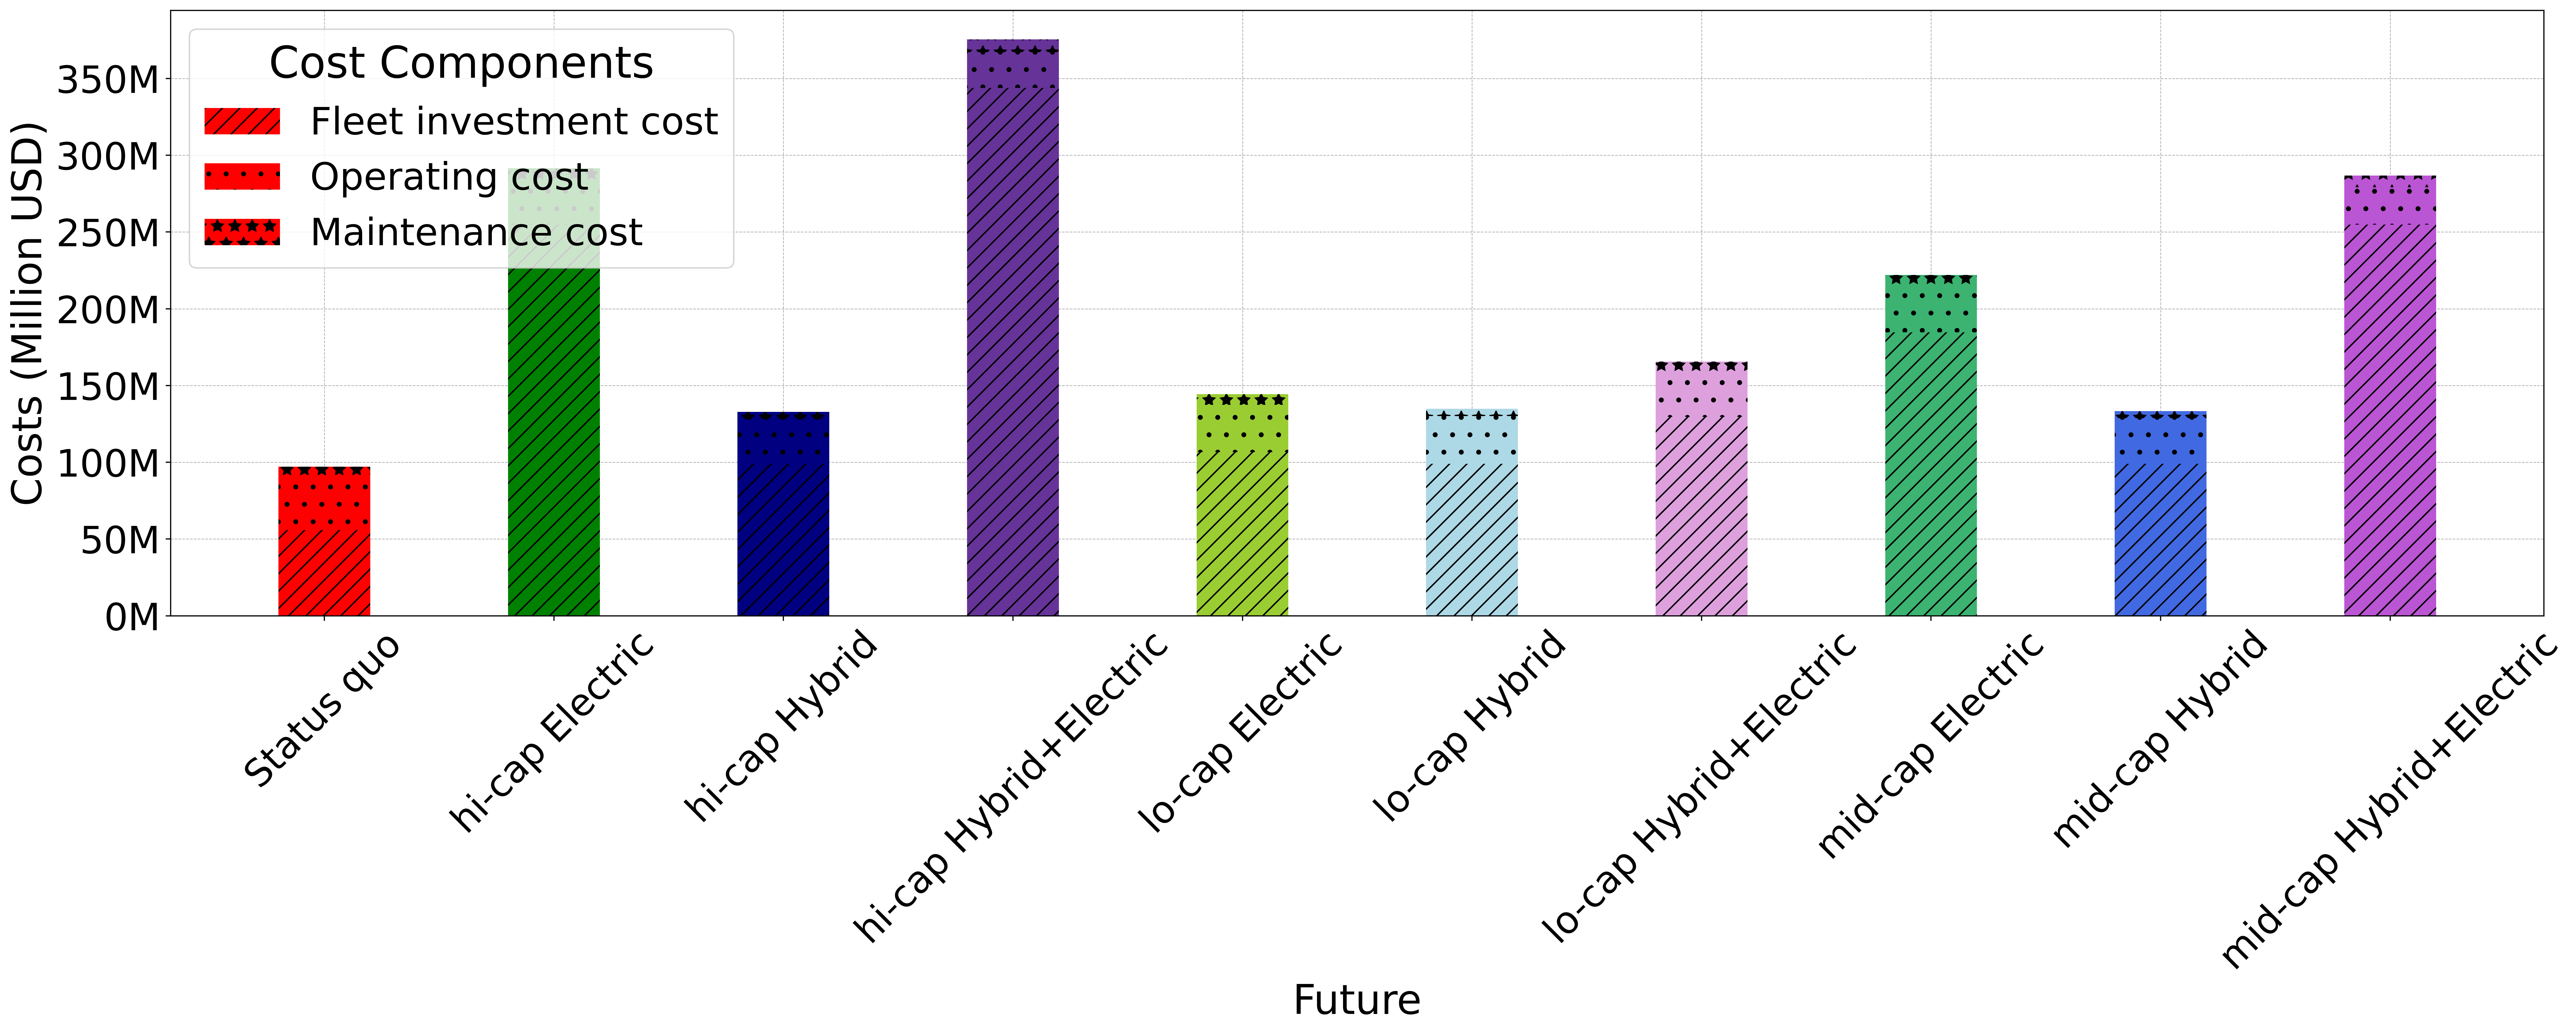

In [44]:
# Define the custom color palette with the new strategy names
custom_palette = {
    "Status quo": "red",
    "lo-cap Hybrid": "lightblue",
    "mid-cap Hybrid": "royalblue",
    "hi-cap Hybrid": "navy",
    #"hi-cap Hybrid": "mediumblue",
    "lo-cap Hybrid+Electric": "plum",
    "mid-cap Hybrid+Electric": "mediumorchid",
    "hi-cap Hybrid+Electric": "rebeccapurple",
    "lo-cap Electric": "yellowgreen",
    "mid-cap Electric": "mediumseagreen",
    "hi-cap Electric": "green"
}

# Group the data by 'future' and calculate the total operating and maintenance costs for each strategy
grouped_df = result_df.groupby('future').agg({
    'operating_cost': 'sum',
    'maintenance_cost': 'sum',
    'fleet_investment': 'sum'
}).reset_index()

# Convert costs to millions
grouped_df['operating_cost'] = grouped_df['operating_cost'] / 1e6
grouped_df['maintenance_cost'] = grouped_df['maintenance_cost'] / 1e6

# Set the positions and width for the bars
positions = np.arange(len(grouped_df))
bar_width = 0.4

# Create the plot
plt.figure(figsize=(25, 10), dpi=400)

# Plot the operating costs
plt.bar(positions, grouped_df['fleet_investment'], color=[custom_palette[future] for future in grouped_df['future']], 
        label='Fleet investment cost', width=bar_width, hatch='//')

plt.bar(positions, grouped_df['operating_cost'], bottom=grouped_df['fleet_investment'], color=[custom_palette[future] for future in grouped_df['future']], 
        label='Operating cost', width=bar_width, hatch='.')

# Plot the maintenance costs
plt.bar(positions, grouped_df['maintenance_cost'], bottom=grouped_df['operating_cost']+grouped_df['fleet_investment'], 
        color=[custom_palette[future] for future in grouped_df['future']], 
        label='Maintenance cost', width=bar_width, hatch='*')

# Add titles and labels
plt.xlabel('Future', fontsize=28)
plt.ylabel('Costs (Million USD)', fontsize=28)
#plt.title('Total Operating and Maintenance Costs by Strategy', fontsize=32)
plt.xticks(positions, grouped_df['future'], fontsize=26, rotation=45)
plt.yticks(fontsize=26)

# Format y-axis to show values in million USD
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}M'))

# Move grid lines to the background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)

# Adjust the legend
plt.legend(title='Cost Components', fontsize=26, title_fontsize=30, loc='upper left')

# Save and display the plot
plt.tight_layout()
plt.savefig(r'../../figures/operating-maintenance-costs-by-strategy.png', dpi=400)
plt.show()


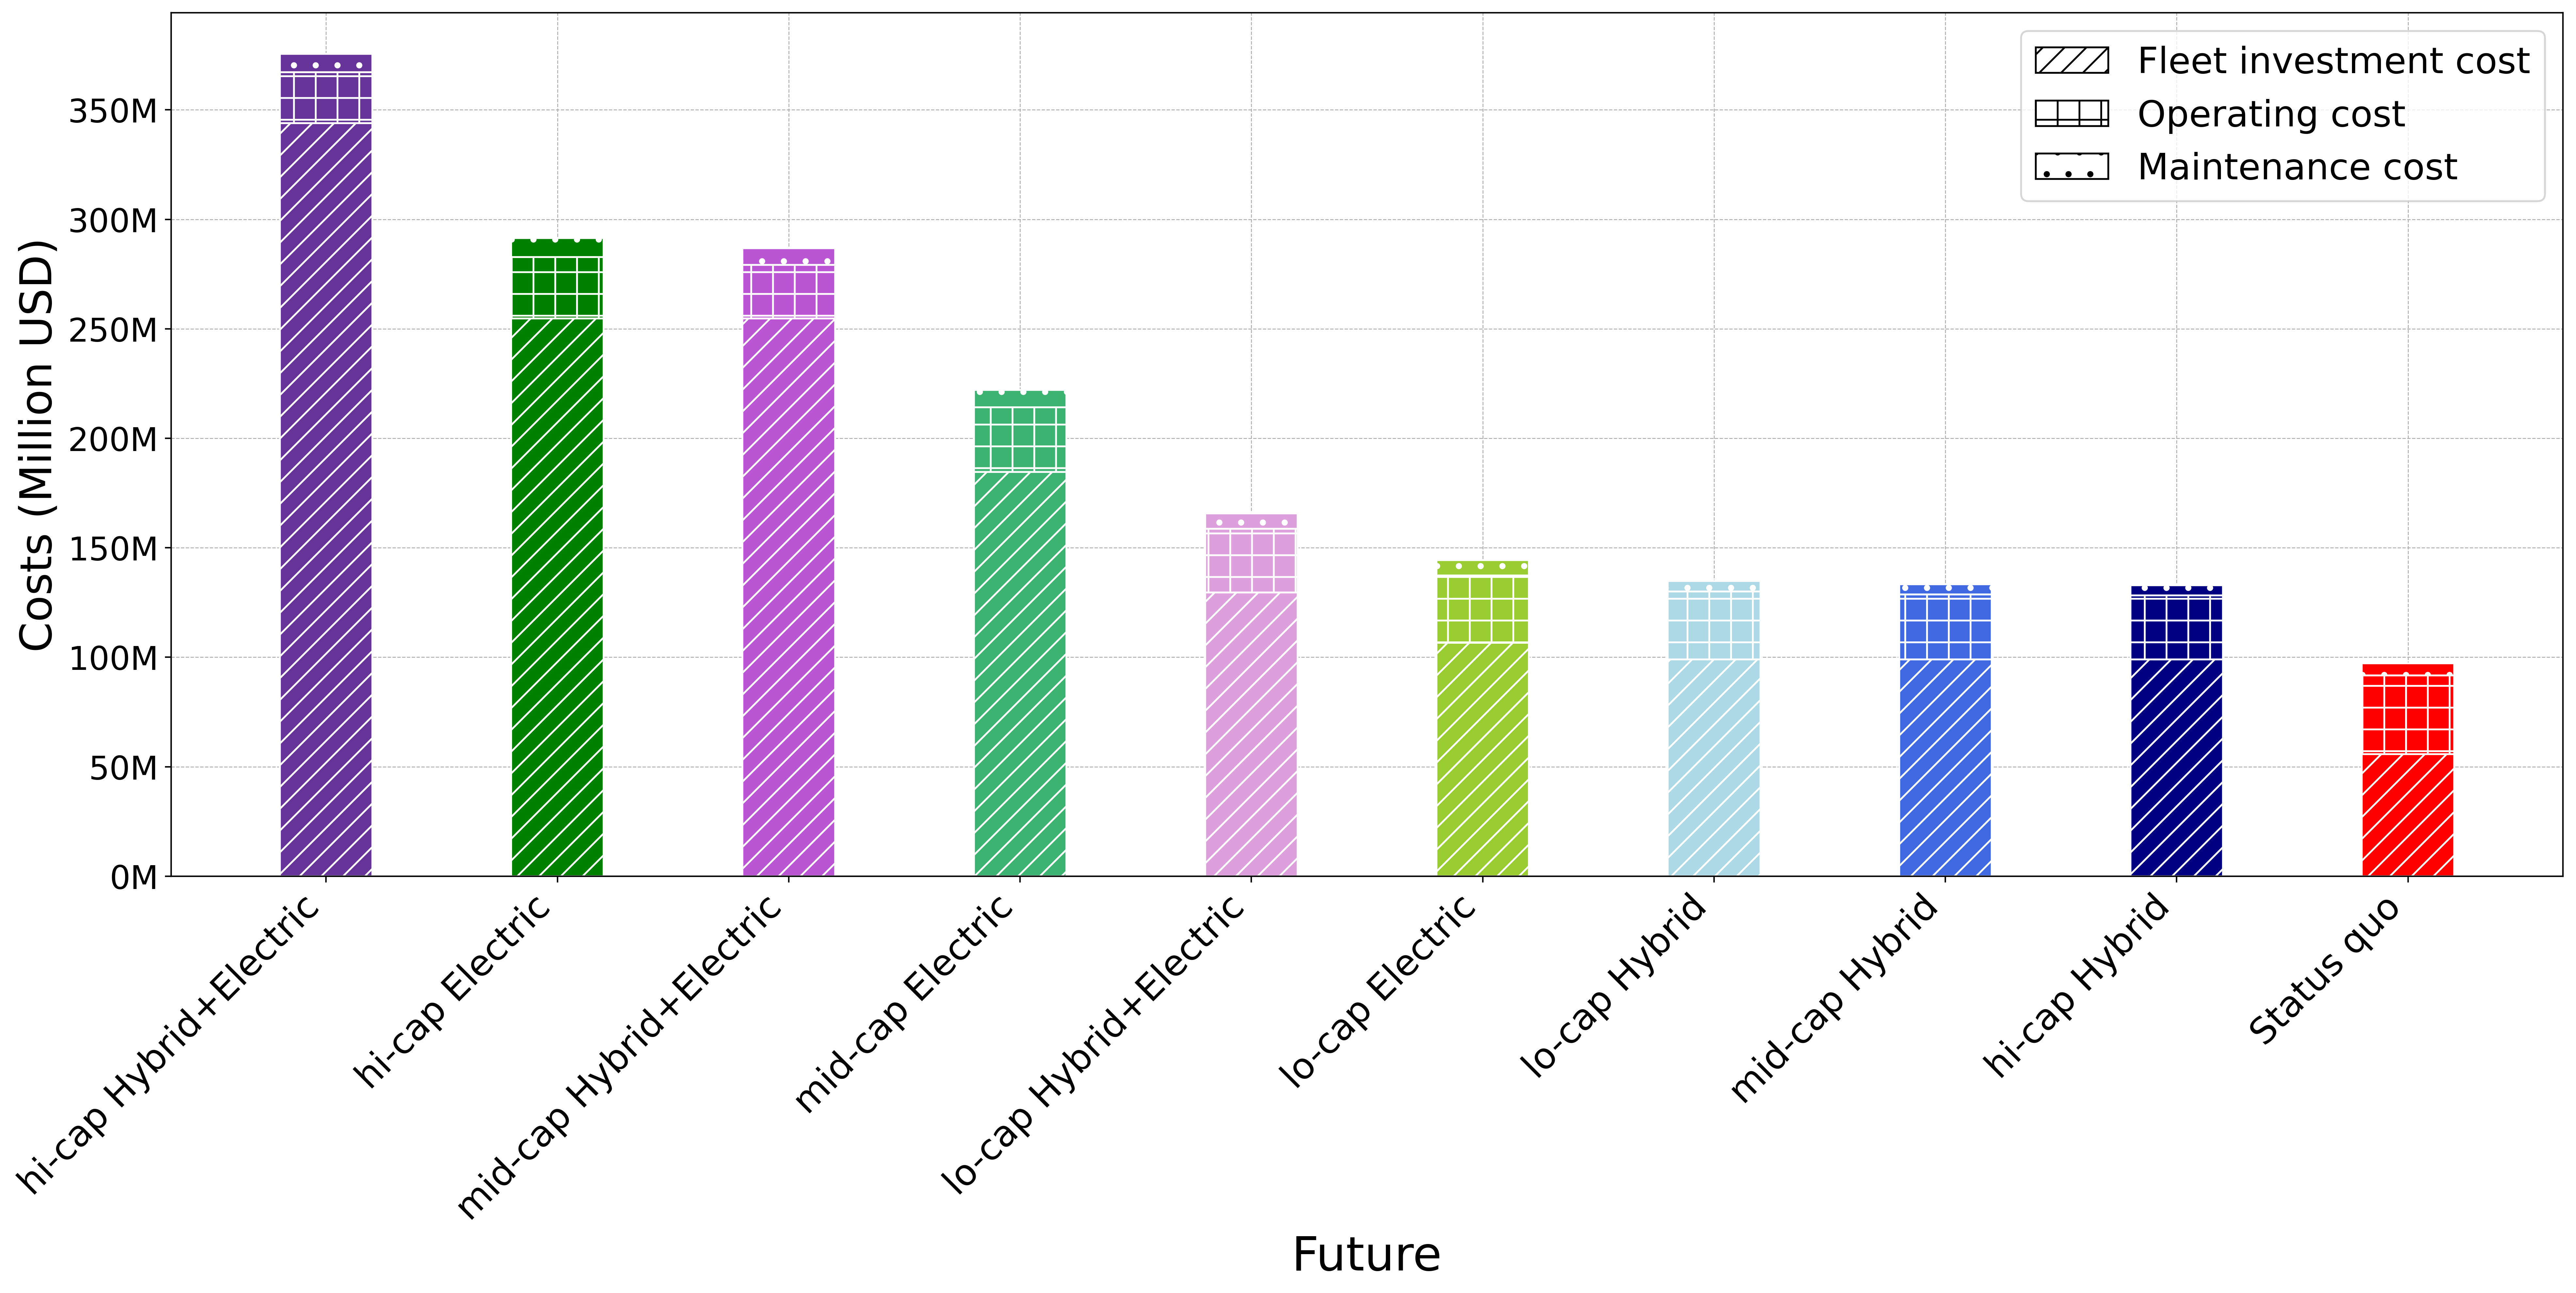

In [45]:
from matplotlib.patches import Patch

# Sort the grouped_df by total cost (operating + maintenance) in descending order
grouped_df['total_cost'] = grouped_df['operating_cost'] + grouped_df['maintenance_cost'] + grouped_df['fleet_investment']
grouped_df = grouped_df.sort_values(by='total_cost', ascending=False).reset_index(drop=True)

# Set the positions and width for the bars (after sorting)
positions = np.arange(len(grouped_df))
bar_width = 0.4

# Create the plot
plt.figure(figsize=(20, 10), dpi=400)

# Plot the fleet investment costs with white hatches
plt.bar(positions, grouped_df['fleet_investment'], 
        color=[custom_palette[future] for future in grouped_df['future']], 
        label='Fleet investment Cost', width=bar_width, hatch='//', edgecolor='white')

# Plot the operating costs with white hatches
plt.bar(positions, grouped_df['operating_cost'], 
        bottom=grouped_df['fleet_investment'], 
        color=[custom_palette[future] for future in grouped_df['future']], 
        label='Operating Cost', width=bar_width, hatch='+', edgecolor='white')

# Plot the maintenance costs with white hatches
plt.bar(positions, grouped_df['maintenance_cost'], 
        bottom=grouped_df['fleet_investment'] + grouped_df['operating_cost'], 
        color=[custom_palette[future] for future in grouped_df['future']], 
        label='Maintenance Cost', width=bar_width, hatch='.', edgecolor='white')

# Add titles and labels
plt.xlabel('Future', fontsize=26)
plt.ylabel('Costs (Million USD)', fontsize=24)

# Update plt.xticks to improve label alignment
plt.xticks(positions, grouped_df['future'], fontsize=20, rotation=45, ha='right')

plt.yticks(fontsize=18)

# Format y-axis to show values in million USD
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}M'))

# Move grid lines to the background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)

# Adjust the legend to show only hatches, not colors in legend
legend_elements = [Patch(facecolor='white', edgecolor='black', hatch='//', label='Fleet investment cost'),
                   Patch(facecolor='white', edgecolor='black', hatch='+', label='Operating cost'),
                   Patch(facecolor='white', edgecolor='black', hatch='.', label='Maintenance cost')]

plt.legend(handles=legend_elements, title='', fontsize=20, title_fontsize=26, loc='upper right')

# Save and display the plot
plt.tight_layout()
plt.savefig(r'../../figures/operating-maintenance-costs-by-strategy.png', dpi=400)
plt.show()


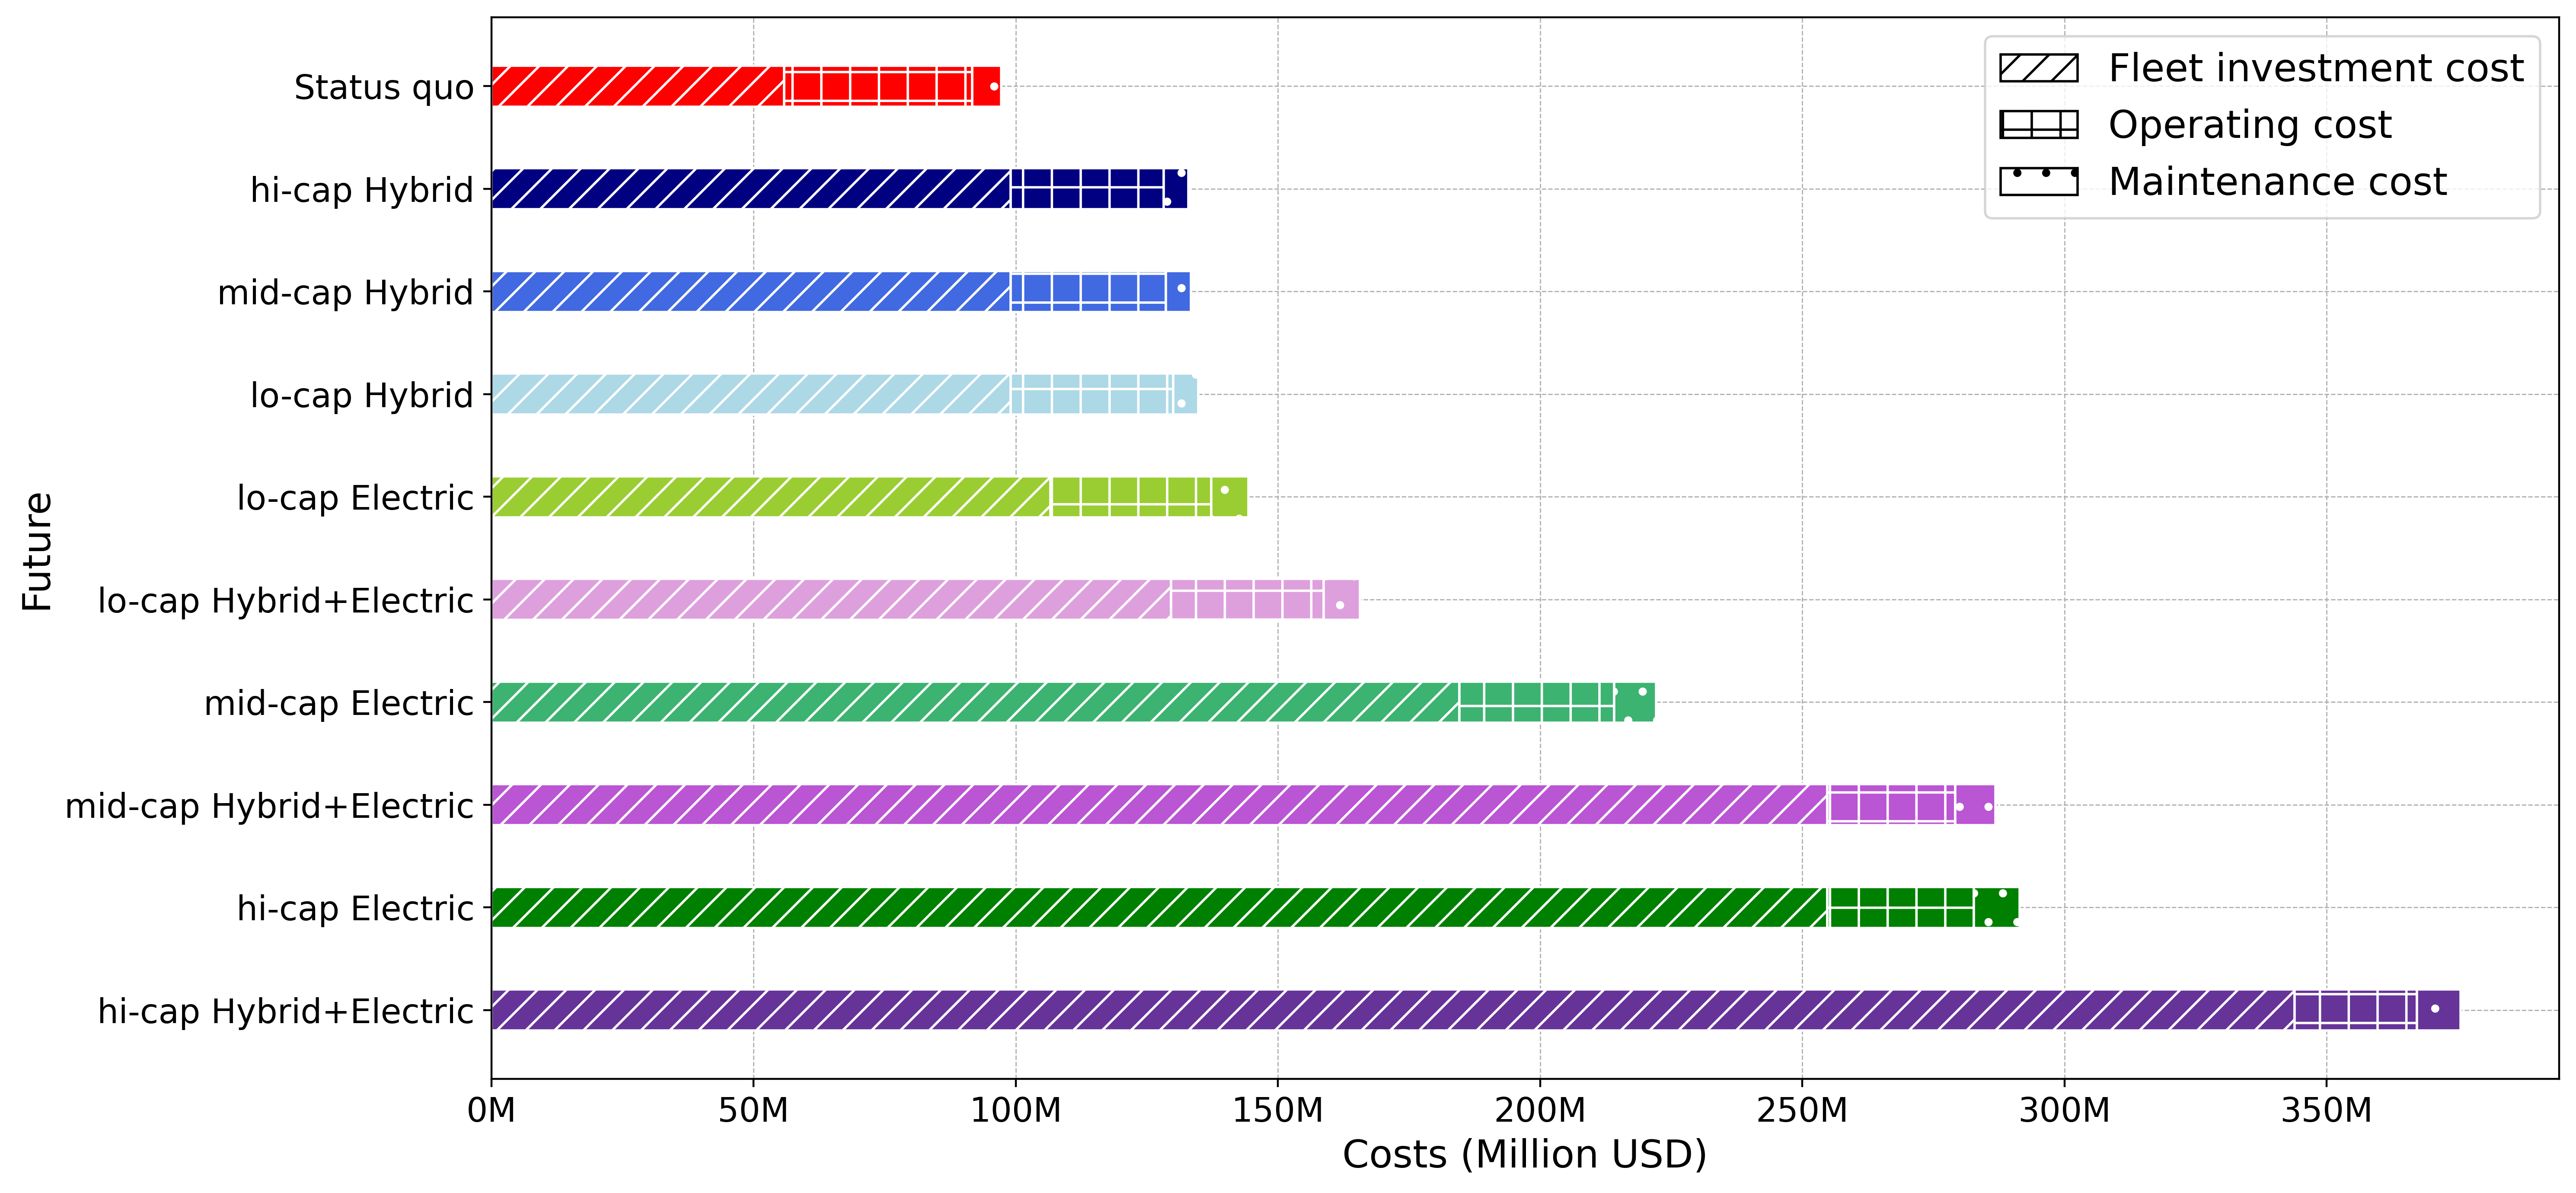

In [51]:
# Sort the grouped_df by total cost (operating + maintenance + fleet investment) in descending order
grouped_df['total_cost'] = grouped_df['operating_cost'] + grouped_df['maintenance_cost'] + grouped_df['fleet_investment']
grouped_df = grouped_df.sort_values(by='total_cost', ascending=False).reset_index(drop=True)

# Set the positions and width for the bars (after sorting)
positions = np.arange(len(grouped_df))
bar_height = 0.4

# Create the plot
plt.figure(figsize=(15, 7), dpi=400)

# Plot the fleet investment costs with white hatches (horizontal bars)
plt.barh(positions, grouped_df['fleet_investment'], 
         color=[custom_palette[future] for future in grouped_df['future']], 
         label='Fleet investment Cost', height=bar_height, hatch='//', edgecolor='white')

# Plot the operating costs with white hatches (stacked on top of fleet investment)
plt.barh(positions, grouped_df['operating_cost'], 
         left=grouped_df['fleet_investment'], 
         color=[custom_palette[future] for future in grouped_df['future']], 
         label='Operating Cost', height=bar_height, hatch='+', edgecolor='white')

# Plot the maintenance costs with white hatches (stacked on top of fleet investment and operating)
plt.barh(positions, grouped_df['maintenance_cost'], 
         left=grouped_df['fleet_investment'] + grouped_df['operating_cost'], 
         color=[custom_palette[future] for future in grouped_df['future']], 
         label='Maintenance Cost', height=bar_height, hatch='.', edgecolor='white')

# Add titles and labels
plt.ylabel('Future', fontsize=16)  # 'Future' categories are now along the y-axis
plt.xlabel('Costs (Million USD)', fontsize=16)

# Update plt.yticks to improve label alignment for the categories
plt.yticks(positions, grouped_df['future'], fontsize=14)
plt.xticks(fontsize=14)

# Format x-axis to show values in million USD
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}M'))

# Move grid lines to the background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)

# Adjust the legend to show only hatches, not colors in the legend
legend_elements = [Patch(facecolor='white', edgecolor='black', hatch='//', label='Fleet investment cost'),
                   Patch(facecolor='white', edgecolor='black', hatch='+', label='Operating cost'),
                   Patch(facecolor='white', edgecolor='black', hatch='.', label='Maintenance cost')]

plt.legend(handles=legend_elements, title='', fontsize=16, title_fontsize=26, loc='upper right')

# Save and display the plot
plt.tight_layout()
plt.savefig(r'../../figures/operating-maintenance-costs-by-strategy-horizontal.png', dpi=400)
plt.show()


In [583]:
# Save to CSV in a local directory (adjust path as per your environment)
csv_path = r'../../results/futures-allcosts-data.csv'

# Saving the DataFrame as a CSV file
result_df.to_csv(csv_path, index=False)

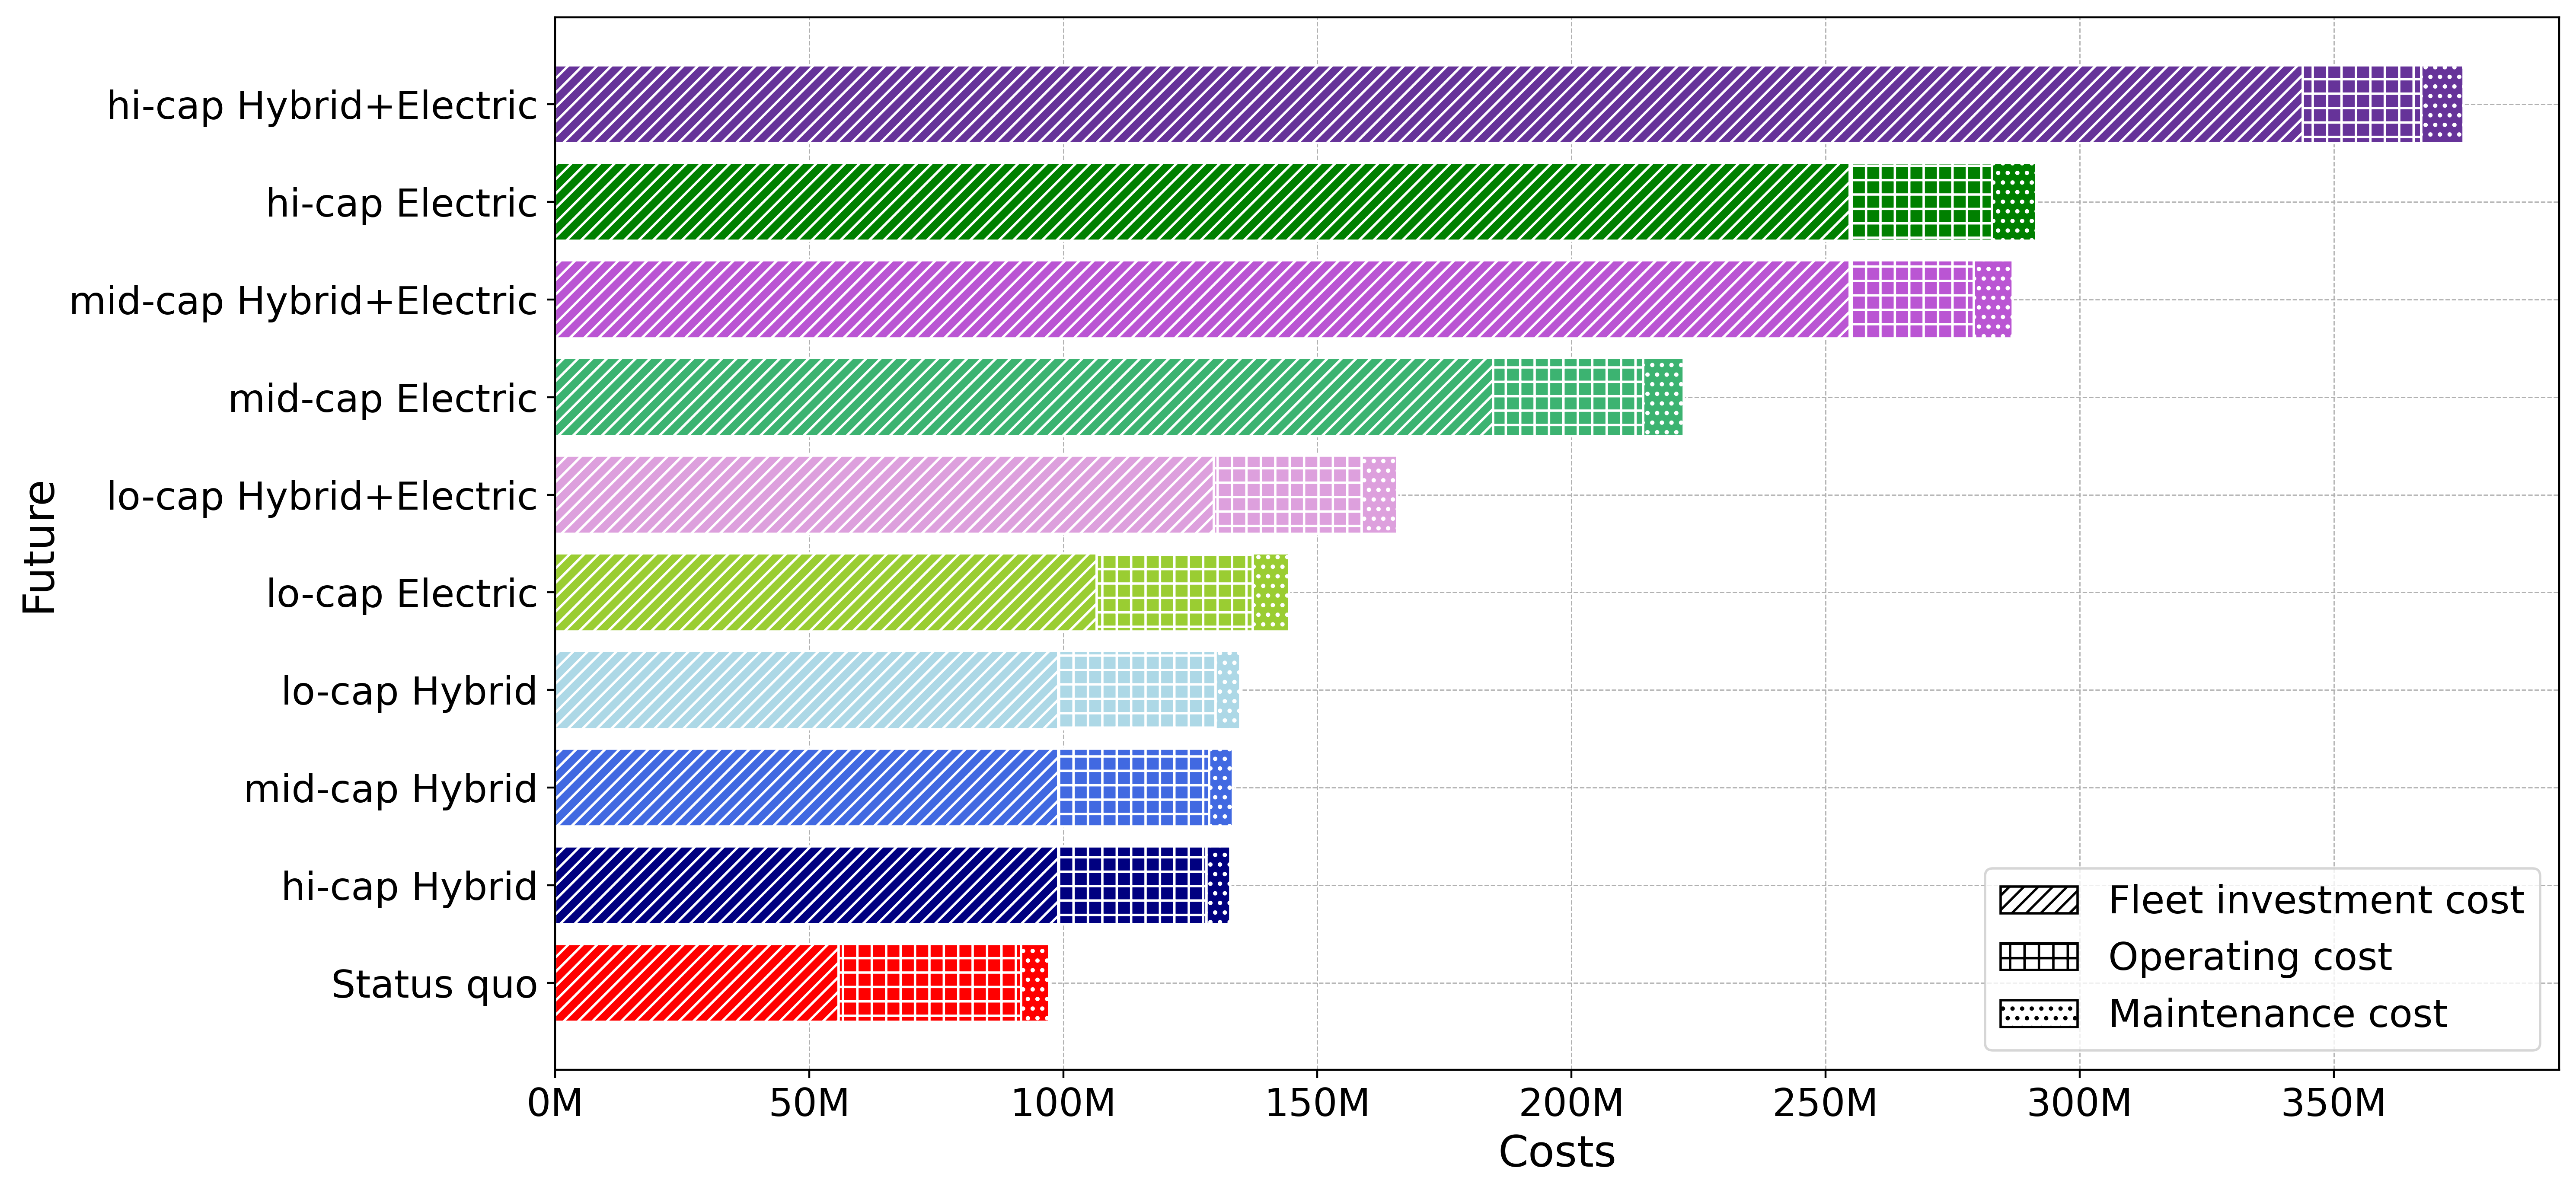

In [56]:
# Sort the grouped_df by total cost (operating + maintenance + fleet investment) in descending order
grouped_df['total_cost'] = grouped_df['operating_cost'] + grouped_df['maintenance_cost'] + grouped_df['fleet_investment']
grouped_df = grouped_df.sort_values(by='total_cost', ascending=True).reset_index(drop=True)

# Set the positions and width for the bars (after sorting)
positions = np.arange(len(grouped_df))
bar_height = 0.8  # Increased the thickness of the bars

# Create the plot
plt.figure(figsize=(15, 7), dpi=400)

# Plot the fleet investment costs with more discernible hatches (horizontal bars)
plt.barh(positions, grouped_df['fleet_investment'], 
         color=[custom_palette[future] for future in grouped_df['future']], 
         label='Fleet investment Cost', height=bar_height, hatch='////', edgecolor='white')

# Plot the operating costs with more discernible hatches (stacked on top of fleet investment)
plt.barh(positions, grouped_df['operating_cost'], 
         left=grouped_df['fleet_investment'], 
         color=[custom_palette[future] for future in grouped_df['future']], 
         label='Operating Cost', height=bar_height, hatch='++', edgecolor='white')

# Plot the maintenance costs with more discernible hatches (stacked on top of fleet investment and operating)
plt.barh(positions, grouped_df['maintenance_cost'], 
         left=grouped_df['fleet_investment'] + grouped_df['operating_cost'], 
         color=[custom_palette[future] for future in grouped_df['future']], 
         label='Maintenance Cost', height=bar_height, hatch='...', edgecolor='white')

# Add titles and labels
plt.ylabel('Future', fontsize=18)  # Increased font size of y-axis labels
plt.xlabel('Costs', fontsize=18)   # Removed "(Million USD)" from the x-axis label

# Update plt.yticks to improve label alignment for the categories
plt.yticks(positions, grouped_df['future'], fontsize=16)  # Increased font size of y-axis labels
plt.xticks(fontsize=16)

# Format x-axis to show values in million USD with the M symbol
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}M'))

# Move grid lines to the background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_axisbelow(True)

# Adjust the legend to show only hatches, not colors in the legend
legend_elements = [Patch(facecolor='white', edgecolor='black', hatch='////', label='Fleet investment cost'),
                   Patch(facecolor='white', edgecolor='black', hatch='++', label='Operating cost'),
                   Patch(facecolor='white', edgecolor='black', hatch='...', label='Maintenance cost')]

plt.legend(handles=legend_elements, title='', fontsize=16, title_fontsize=26, loc='lower right')

# Save and display the plot
plt.tight_layout()
plt.savefig(r'../../figures/operating-maintenance-costs-by-strategy-horizontal.png', dpi=400)
plt.show()
